AIM:- Implement hierarchical clustering algorithms and do prediction for unknown data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

In [2]:
df = pd.read_csv("winequality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
x = df.iloc[:,:11]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [4]:
# normalizing the data
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled,columns=df.columns)
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.039424,0.001521,0.002028,0.116583,0.000253,0.253440,0.957441,0.005638,0.016896,0.002534,0.049562,0.033792
1,0.047219,0.002249,0.002548,0.011992,0.000367,0.104932,0.989359,0.007450,0.024734,0.003673,0.071204,0.044971
2,0.078777,0.002723,0.003890,0.067107,0.000486,0.291767,0.943382,0.009678,0.031705,0.004279,0.098228,0.058353
3,0.037393,0.001195,0.001662,0.044145,0.000301,0.244095,0.965995,0.005171,0.016567,0.002077,0.051416,0.031161
4,0.037393,0.001195,0.001662,0.044145,0.000301,0.244095,0.965995,0.005171,0.016567,0.002077,0.051416,0.031161


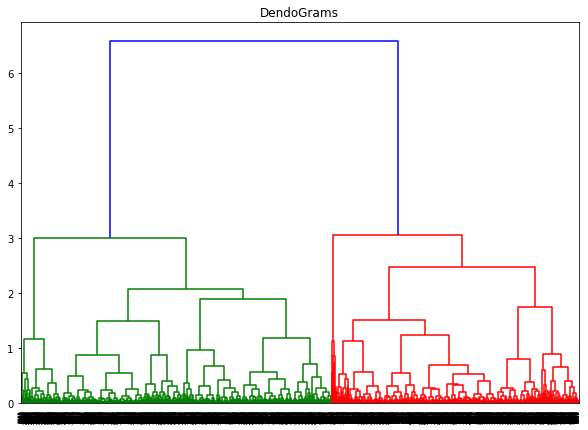

In [5]:
plt.figure(figsize=(10,7))
plt.title("DendoGrams")
dend = shc.dendrogram(shc.linkage(data_scaled,method = 'ward'))

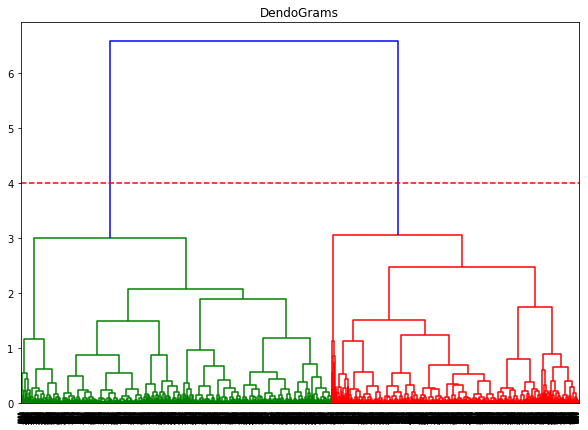

In [6]:
plt.figure(figsize=(10,7))
plt.title("DendoGrams")
dend = shc.dendrogram(shc.linkage(data_scaled,method = 'ward'))
plt.axhline(y=4,color='r',linestyle='--')
plt.show()

In [7]:
cluster = AC(n_clusters=5,affinity='euclidean',linkage = 'ward')
cluster.fit_predict(data_scaled)

array([0, 1, 0, ..., 0, 4, 4], dtype=int64)

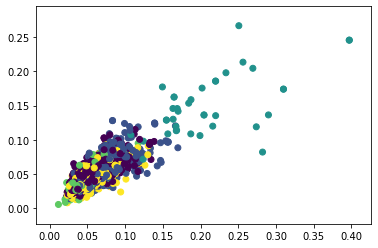

In [8]:
plt.scatter(data_scaled['fixed acidity'],data_scaled['quality'],c=cluster.labels_)
plt.show()

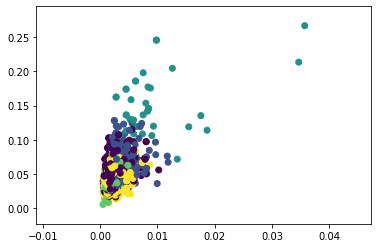

In [9]:
plt.scatter(data_scaled['volatile acidity'],data_scaled['quality'],c=cluster.labels_)
plt.show()

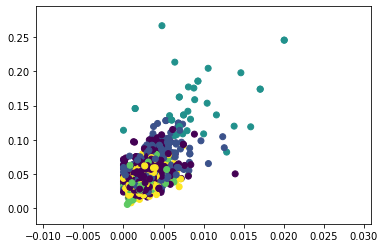

In [10]:
plt.scatter(data_scaled['citric acid'],data_scaled['quality'],c=cluster.labels_)
plt.show()

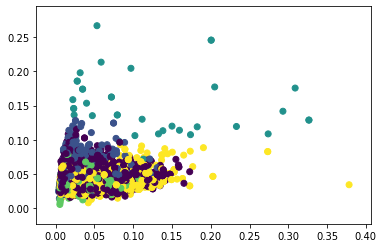

In [11]:
plt.scatter(data_scaled['residual sugar'],data_scaled['quality'],c=cluster.labels_)
plt.show()

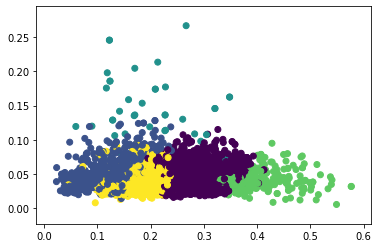

In [12]:
plt.scatter(data_scaled['free sulfur dioxide'],data_scaled['quality'],c=cluster.labels_)
plt.show()

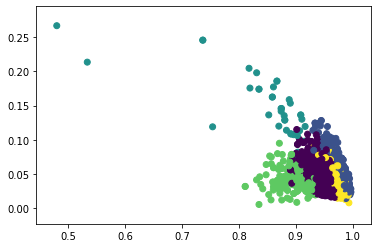

In [13]:
plt.scatter(data_scaled['total sulfur dioxide'],data_scaled['quality'],c=cluster.labels_)
plt.show()

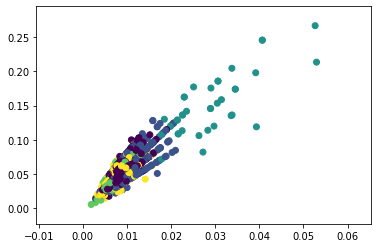

In [14]:
plt.scatter(data_scaled['density'],data_scaled['quality'],c=cluster.labels_)
plt.show()

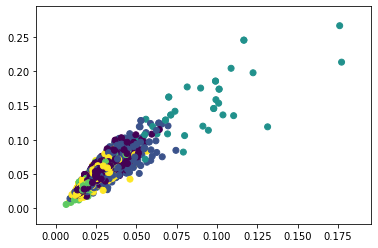

In [15]:
plt.scatter(data_scaled['pH'],data_scaled['quality'],c=cluster.labels_)
plt.show()

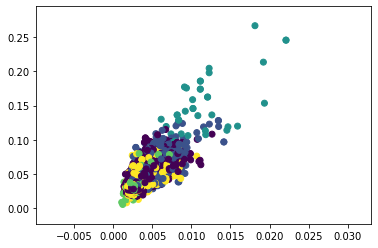

In [16]:
plt.scatter(data_scaled['sulphates'],data_scaled['quality'],c=cluster.labels_)
plt.show()

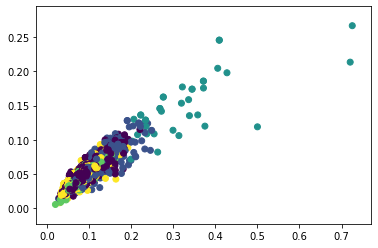

In [17]:
plt.scatter(data_scaled['alcohol'],data_scaled['quality'],c=cluster.labels_)
plt.show()